<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Взаимосвязи-в-данных" data-toc-modified-id="Взаимосвязи-в-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Взаимосвязи в данных</a></span><ul class="toc-item"><li><span><a href="#Пол-клиента,-день-недели-и-чаевые" data-toc-modified-id="Пол-клиента,-день-недели-и-чаевые-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пол клиента, день недели и чаевые</a></span></li><li><span><a href="#Корреляции" data-toc-modified-id="Корреляции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Корреляции</a></span></li></ul></li><li><span><a href="#Разные-свойства" data-toc-modified-id="Разные-свойства-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разные свойства</a></span><ul class="toc-item"><li><span><a href="#cdf-и-правило-3-сигм" data-toc-modified-id="cdf-и-правило-3-сигм-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cdf и правило 3 сигм</a></span></li><li><span><a href="#Куртозис-и-эксцесс" data-toc-modified-id="Куртозис-и-эксцесс-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Куртозис и эксцесс</a></span></li><li><span><a href="#Гистограмма-и-kde" data-toc-modified-id="Гистограмма-и-kde-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Гистограмма и kde</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Стандартизация</a></span></li><li><span><a href="#Сдвиги-по-осям-X-и-Y" data-toc-modified-id="Сдвиги-по-осям-X-и-Y-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Сдвиги по осям X и Y</a></span></li><li><span><a href="#Кодирование-категориальных-переменных" data-toc-modified-id="Кодирование-категориальных-переменных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Кодирование категориальных переменных</a></span></li></ul></li></ul></div>

## Для начала: небольшой обзор домашнего задания (что от вас хотят)

Сгенерируйте 2 выборки из нормального:

1) размера 100 с параметрами $\mu = 1, \sigma^2 = 1$, 

2) размера 1000 с параметрами $\mu = 0, \sigma^2 = 10$, 

In [174]:
first = stats.norm(loc=1, scale=1).rvs(size=100)

In [175]:
second = stats.norm(loc=0, scale=np.sqrt(10)).rvs(size=1000)

In [176]:
x = np.linspace(-3, 5, 1000)

In [177]:
np.mean(first)

0.7967616792436274

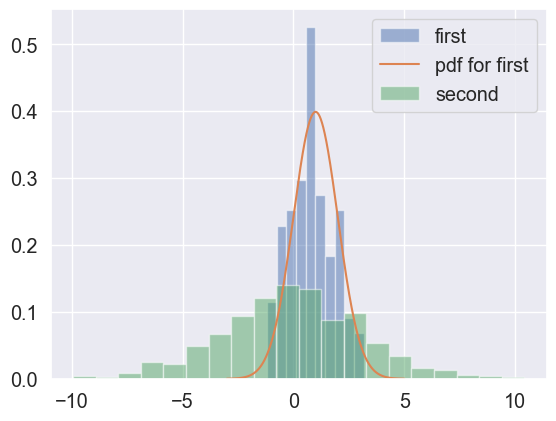

In [178]:
plt.hist(first, label='first', density=True, alpha=0.5)
plt.plot(x,  stats.norm(loc=1, scale=1).pdf(x), label='pdf for first')
plt.hist(second, label='second', density=True, alpha=0.5, bins=20)
plt.legend();

In [ ]:
# оставлять значения, которые меньше или равны заданному, можно, например, так:
second[second<3] # в выборке останутся элементы только меньшие 3 (поможет при удалении выбросов)

In [182]:
# как посчитать выборочный коэффициент эксцесса
np.mean((second - np.mean(second))**4)/np.var(second) ** 2 - 3

0.19194876148273288

#  Взаимосвязи в данных

В этой тетрадке мы поговорим про корреляции. 

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

In [2]:
from statsmodels.api import qqplot

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Будем использовать небольшой набор данных по тому, как люди платят чаевые. 

In [4]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Пол клиента, день недели и чаевые

__Посмотрим как между собой ваимосвязаны счёт, чаевые и пол клиента.__ 

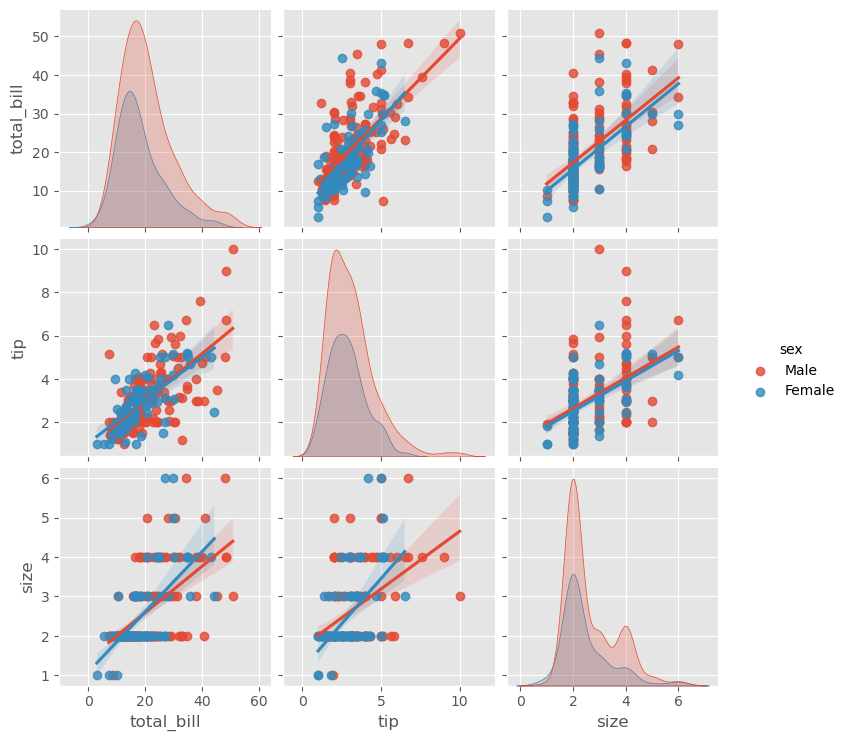

In [5]:
sns.pairplot(df, hue='sex', height=2.5, kind='reg', ); #kind = 'reg'

- Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют
- Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом. 

__Посмотрим на разбиение по дням недели.__

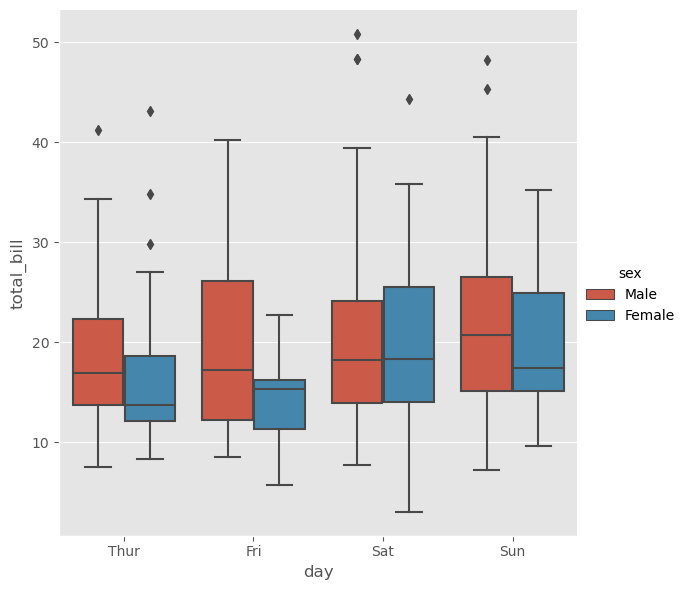

In [6]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, kind="box", height=6);

- Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Возможно, что это как-то связано с пятничными свиданиями и с древней традицией: счёт оплачивает мужчина. Но правда ли это так?

__Давайтте посмотрим сколько наблюдений приходится на какой день недели.__ 

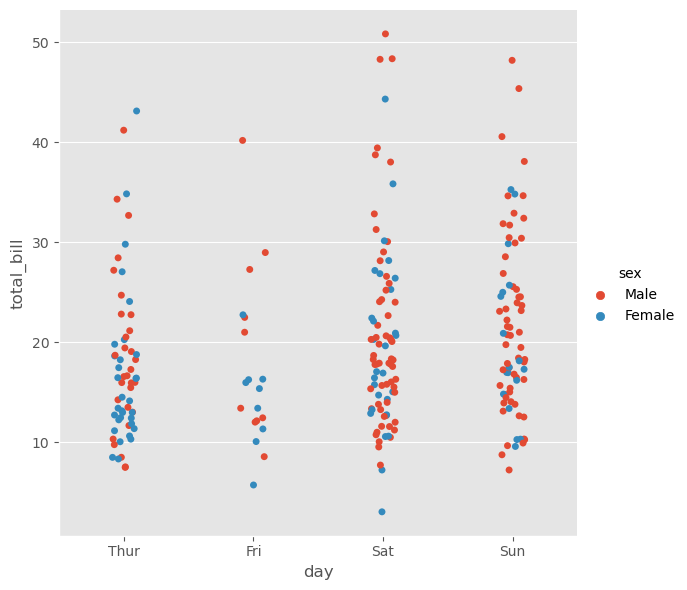

In [7]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, height=6);

- Более подробный взгляд на данные показывает, что это связано не с тем, что счёт оплачивает мужчина, а с тем, что в выборке мало данных с пятницы. Из-за этого мы видим такую разницу между чаевыми. 
- В будущем мы будем говорить про статистические тесты. Они будут помогать нам отличать случайную разницу, как в этом примере, от настоящей. 

## Корреляции

__Можно посмотреть на взаимосвязь только двух переменных.__

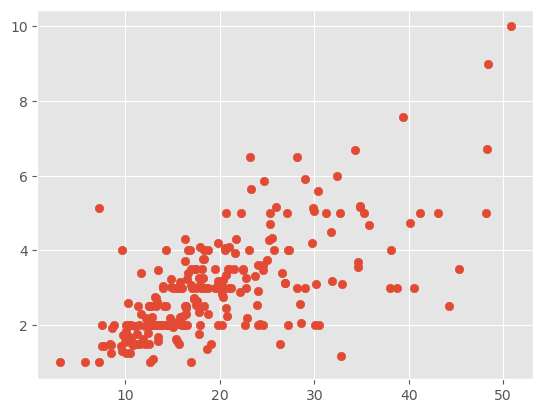

In [8]:
plt.scatter(df['total_bill'], df['tip']);

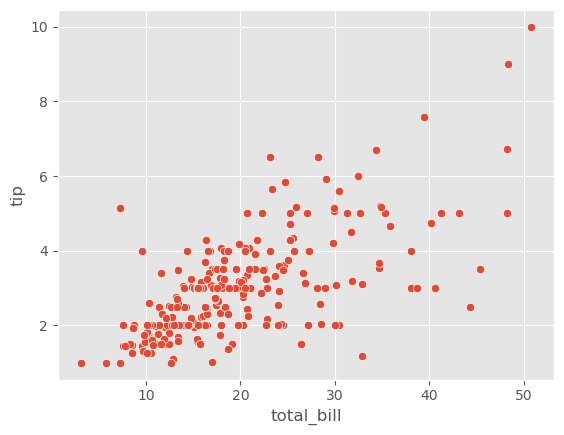

In [9]:
sns.scatterplot(x="total_bill", y="tip", data=df);

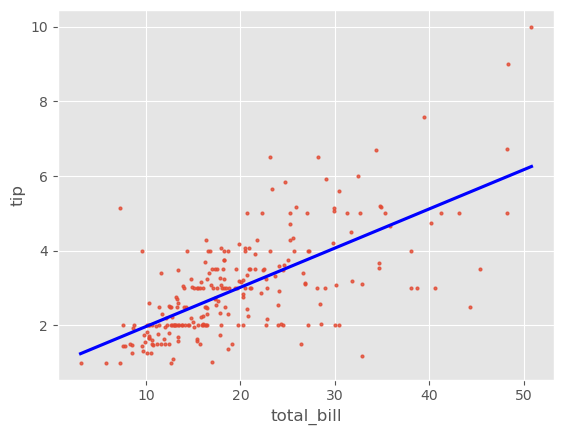

In [10]:
sns.regplot(x="total_bill", y="tip", data=df, 
            line_kws={'color':'blue'},
            scatter_kws={'s':4},
            ci=None
           );

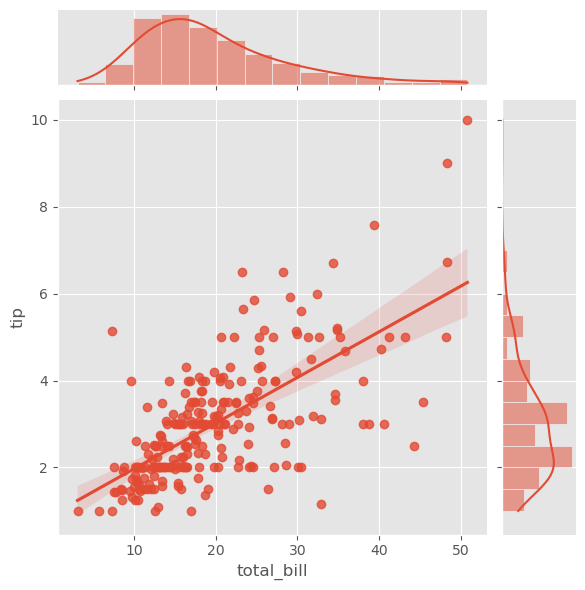

In [11]:
sns.jointplot(x="total_bill", y="tip", data=df, kind='reg');

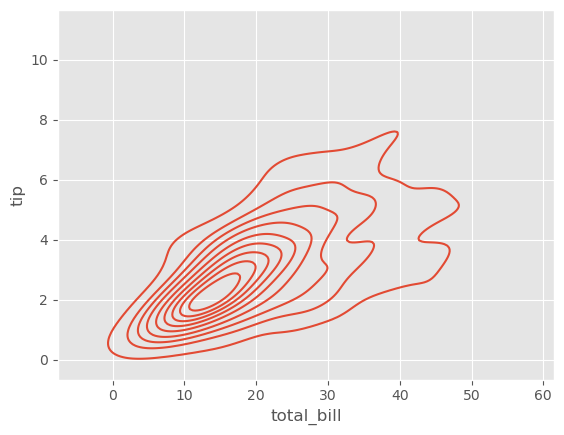

In [12]:
sns.kdeplot(x="total_bill", y="tip", data=df, 
           );

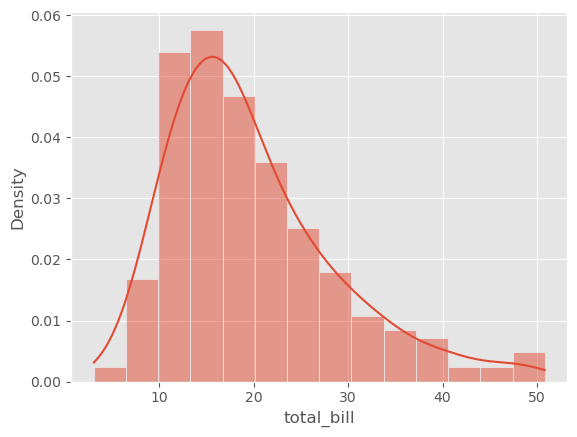

In [13]:
sns.histplot(data=df, x='total_bill', kde=True, stat='density');

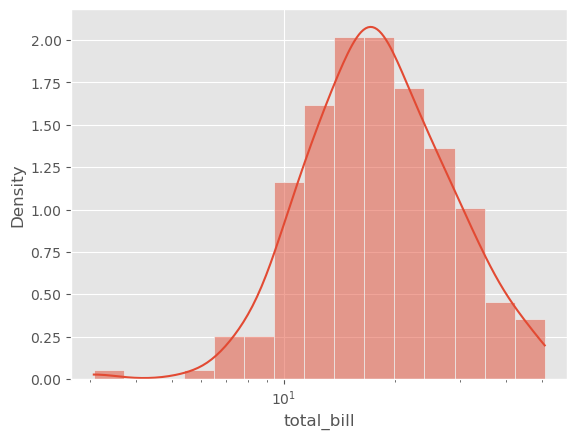

In [14]:
sns.histplot(data=df, x='total_bill', kde=True, stat='density', log_scale=True);

In [15]:
from sklearn.preprocessing import power_transform

<Axes: ylabel='Count'>

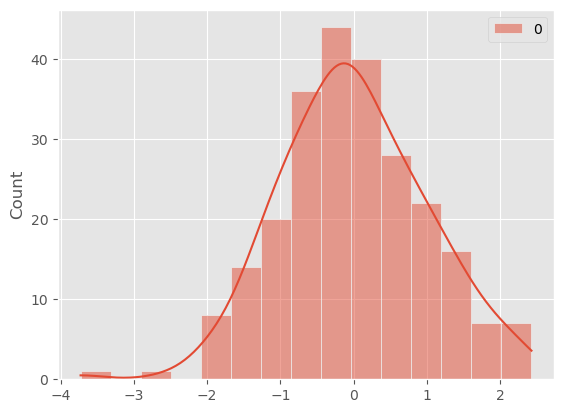

In [16]:
sns.histplot(power_transform(df[['total_bill']]), kde=True)

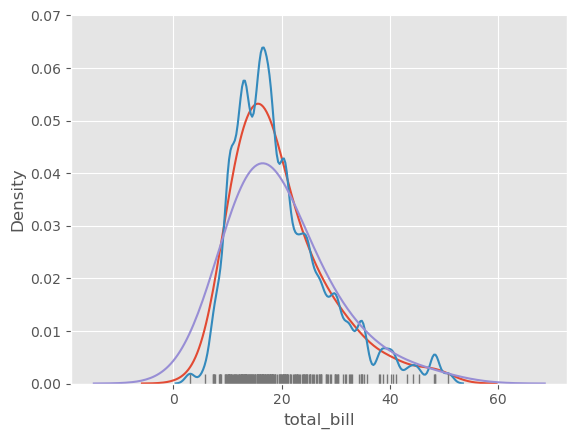

In [17]:
sns.kdeplot(data=df, x='total_bill');
sns.kdeplot(data=df, x='total_bill', bw_adjust=0.3);
sns.kdeplot(data=df, x='total_bill', bw_adjust=2);
sns.rugplot(data=df, x='total_bill');

- Снова видим, что чем больше общий счёт, тем большую сумму оставляют в качестве чаевых. Хочется провести сквозь точки линию регрессии. 

__Посмотрим на ковариационную матрицу.__

In [18]:
df.corr()#method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [19]:
df.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


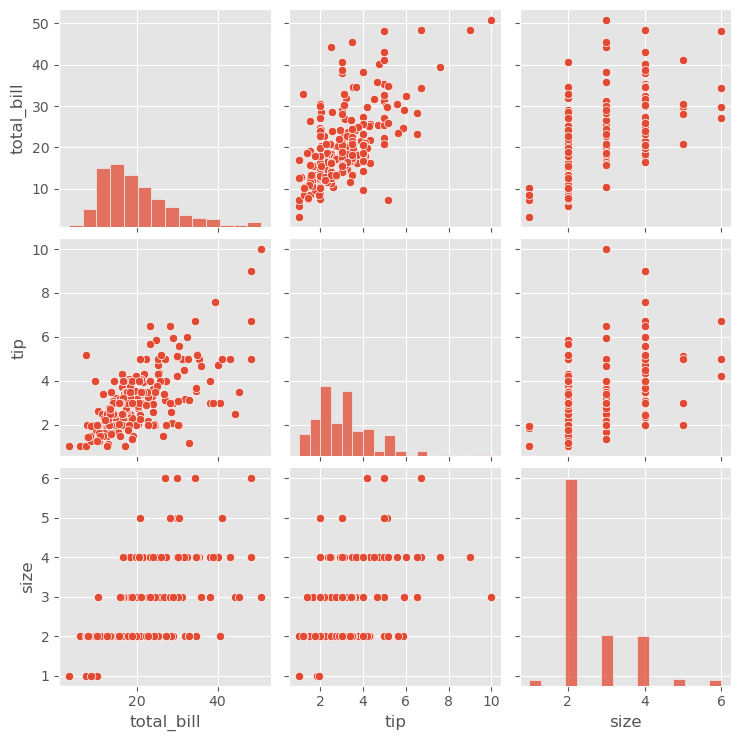

In [20]:
sns.pairplot(df, kind='scatter', );

Можно визуализировать матрицу с помощью тепловой карты. 

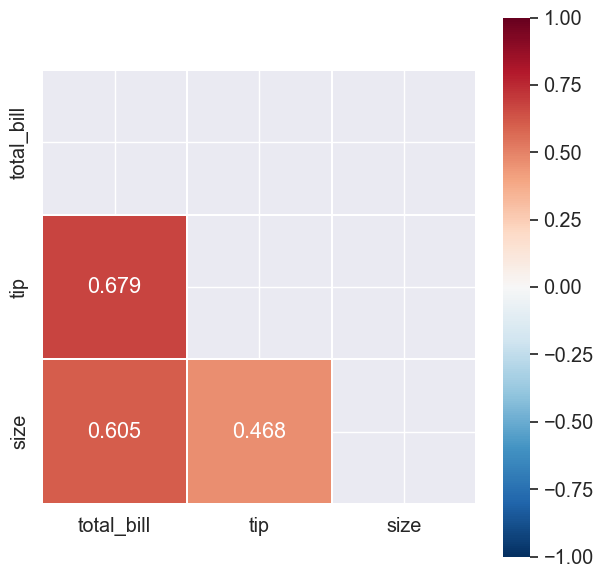

In [21]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))


sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))

sns.heatmap(corr, mask=mask, 
            square=True,
            annot=True, fmt=".3f", 
            linewidths=0.2, cmap="RdBu_r",
            vmin=-1, vmax=1, center=0
           );

- Видно, что корреляция Спирмэна и Пирсона не сильно отличаются друг от друга в нашем примере. Это связано с тем, что взаимосвязи в данных линейные. 

__Пример с рангами из презентации:__

Корреляция Спирмэна - это корреляция Пирсона, которую посчитали между рангами. 

In [22]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])

stats.spearmanr(x, y).correlation

0.644578313253012

In [23]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])

stats.pearsonr(rx, ry)[0]

0.6445783132530121

pearsonr 0.752481827214329
spearmanr 0.9305130513051303


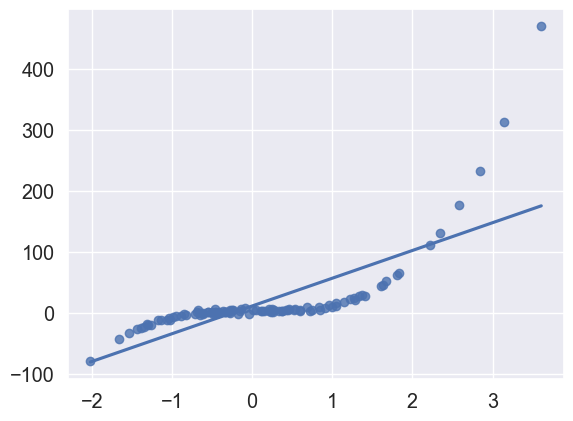

In [24]:
scale = 2

x = stats.norm().rvs(100)
eps = stats.norm(0, scale).rvs(100)
y = 10*x**3 + 3 + eps

sns.regplot(x=x, y=y, ci=None)

print('pearsonr', stats.pearsonr(x,y)[0])
print('spearmanr', stats.spearmanr(x,y)[0])


### Задание в зал:

Сгенерируйте выборку из нормального распределения c матожиданием 0 и дисперсией 10. Это будет выборка X. Посчитайте `sin` от этой выборки - это будет выборка Y, и `sin(x) + 0.02 * x` - это будет выборка Z. Посчитайте корреляции Пирсона и Спирмана для этих трёх выборок попарно. Какие результаты получились?

# Разные свойства [доп материал]

## cdf и правило 3 сигм 

In [25]:
stats.norm.cdf(2)

0.9772498680518208

In [26]:
for i in range(1,4):
    print(i, stats.norm.cdf(i) - stats.norm.cdf(-i))

1 0.6826894921370859
2 0.9544997361036416
3 0.9973002039367398


## Куртозис и эксцесс

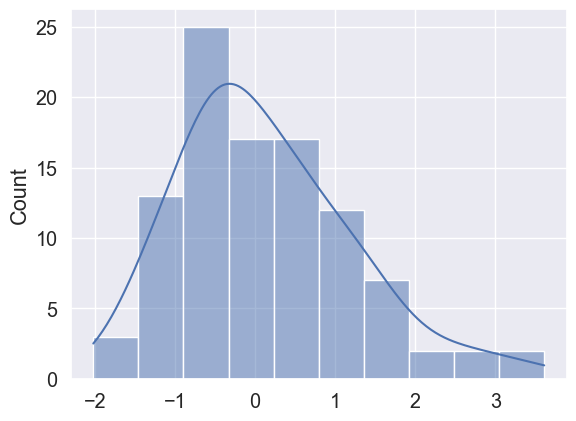

In [27]:
sns.histplot(x, kde=True);

In [28]:
x.mean() - 3*x.std(), x.mean() + 3*x.std()
# в диапозон 3 mu +/- 3*sigma лежат почти все данные

(-3.145617827320777, 3.413442373381761)

In [29]:
stats.kurtosis(x) - 3 # не равно 0 - хвосты менее тяжелые, чем у нормально распределения

-2.5173101905737054

In [30]:
stats.skew(x) # коэффицент ассиметрии > 0 - перекос вправо

0.7506904842319376

-0.7506904842319491

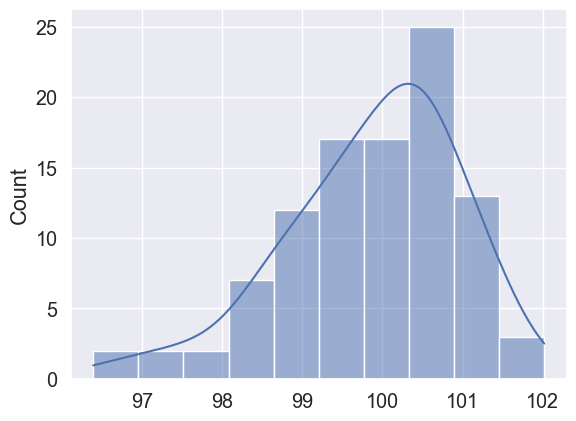

In [31]:
sns.histplot(100-x, kde=True);
# перекос влево
stats.skew(100-x)

## Гистограмма и kde

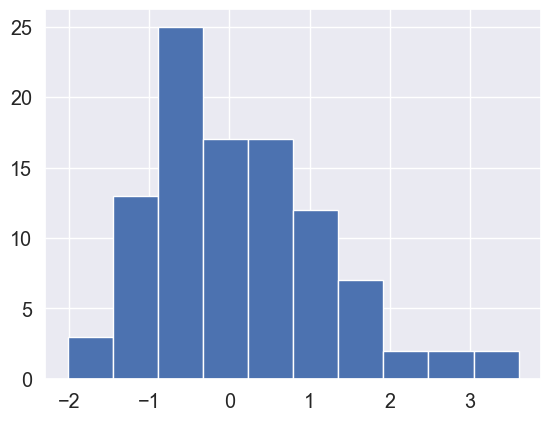

In [33]:
plt.hist(x);

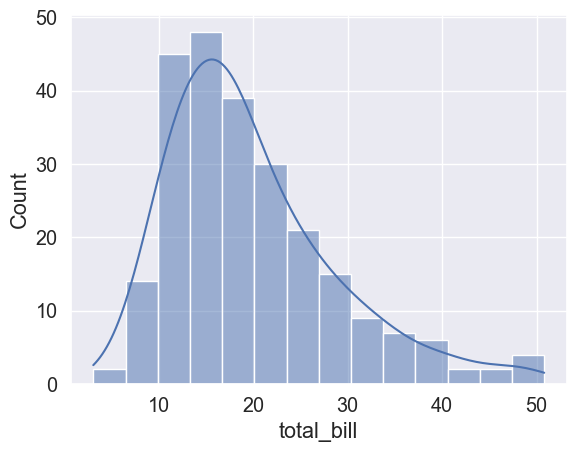

In [34]:
# самый рекомендуемый способ гистограммы
sns.histplot(data=df, x='total_bill', kde=True);

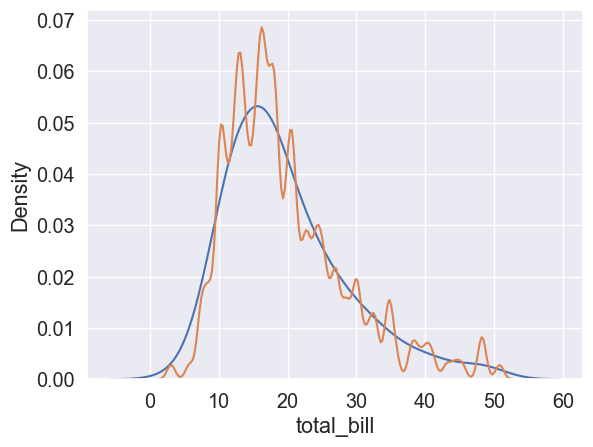

In [35]:
sns.kdeplot(data=df, x='total_bill', bw_adjust=1);
sns.kdeplot(data=df, x='total_bill', bw_adjust=0.2);

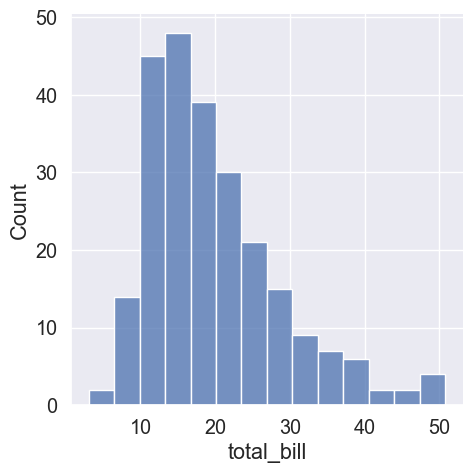

In [36]:
sns.displot(data=df, x='total_bill');

/var/folders/nd/bbrgkx4560737c45lgq__zcwnndg1y/T/ipykernel_68301/1173958573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill']);


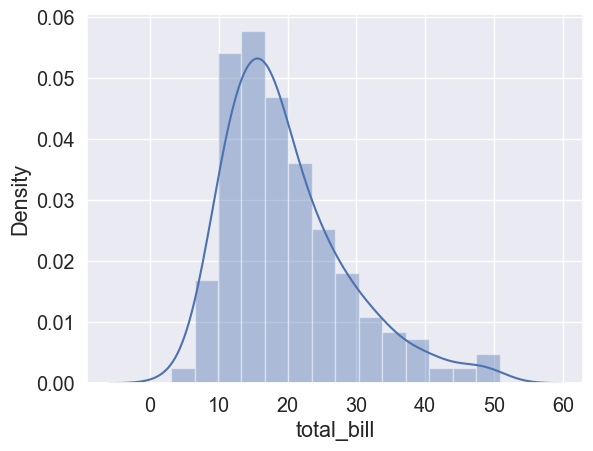

In [37]:
sns.distplot(df['total_bill']);

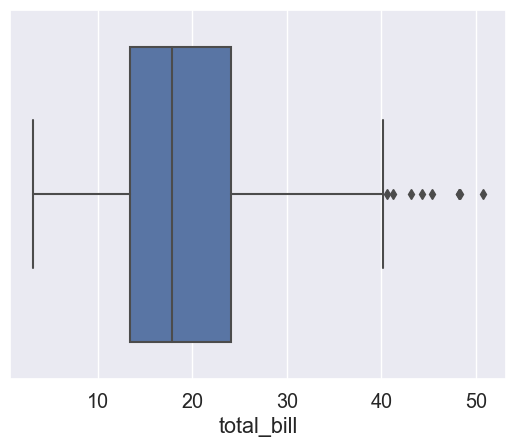

In [38]:
sns.boxplot(x=df['total_bill']);

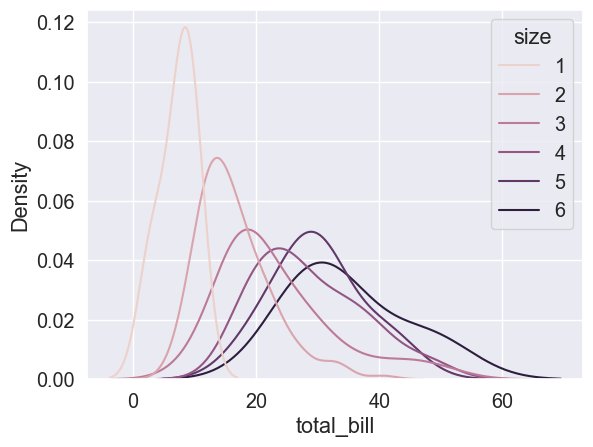

In [39]:
sns.kdeplot(data=df, x='total_bill', hue='size', common_norm=False);

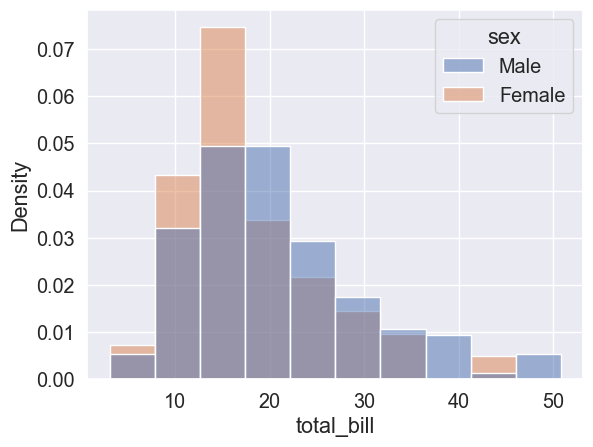

In [40]:
sns.histplot(data=df, x='total_bill', hue='sex', common_norm=False, bins=10, stat='density');

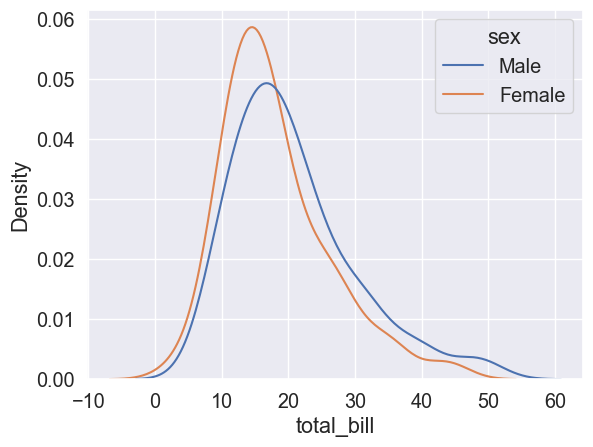

In [41]:
sns.kdeplot(data=df, x='total_bill', hue='sex', common_norm=False);#, bins=10, stat='density');

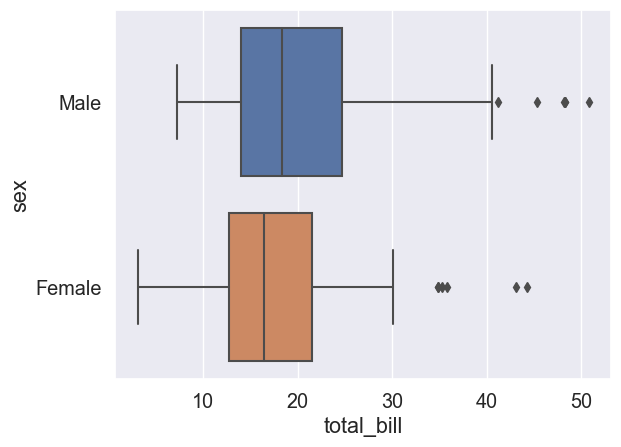

In [42]:
sns.boxplot(data=df, x='total_bill', y='sex');

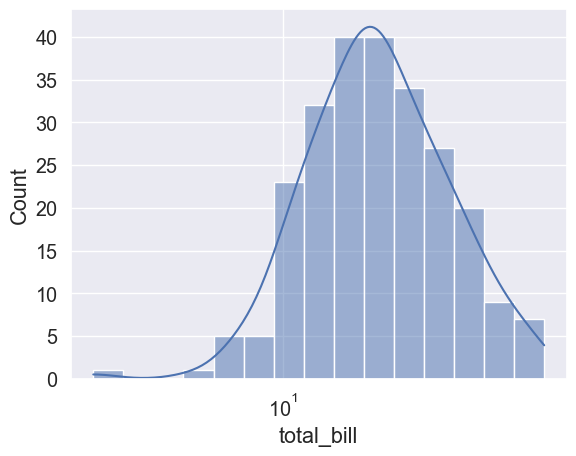

In [43]:
sns.histplot(data=df, x='total_bill', kde=True, log_scale=True);

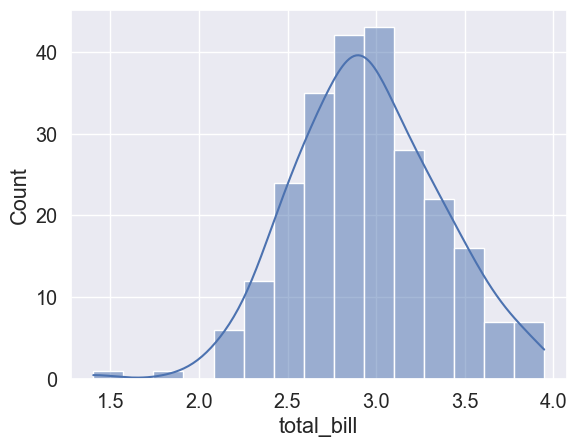

In [44]:
sns.histplot(np.log(1+df['total_bill']), kde=True);

In [45]:
from sklearn.preprocessing import PowerTransformer
# также в scipy.stats есть метод boxcox, можно пользоваться им

transformer = PowerTransformer()
x_transformed = transformer.fit_transform(df[['total_bill']])

In [46]:
transformer.lambdas_

array([0.00806556])

In [47]:
df['total_bill_boxcox'] = x_transformed
df['total_bill_log'] = np.log(1+df['total_bill'])

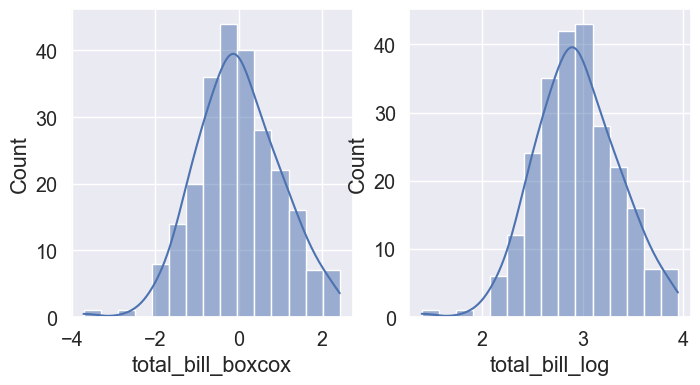

In [48]:
plt.figure(figsize=(8,4))


plt.subplot(121)
sns.histplot(df['total_bill_boxcox'], kde=True);

plt.subplot(122)
sns.histplot(df['total_bill_log'], kde=True);

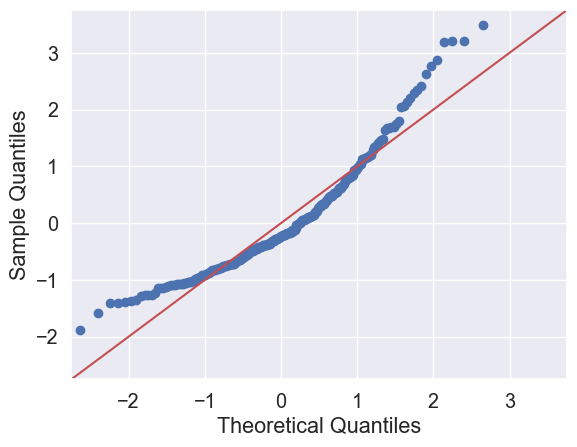

In [49]:
qqplot(df['total_bill'], fit=True, line='45')
plt.show()



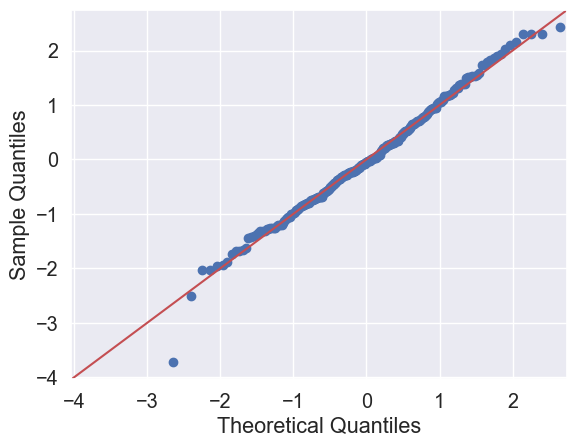

In [50]:
qqplot(df['total_bill_boxcox'], fit=True, line='45')
plt.show()

### Задача в зал:

Сгенерируйте выборку из нормального распределения и возведите её в куб. Посмотрите на результ преобразования Бокса-Кокса

In [145]:
X = stats.norm().rvs(size=100)

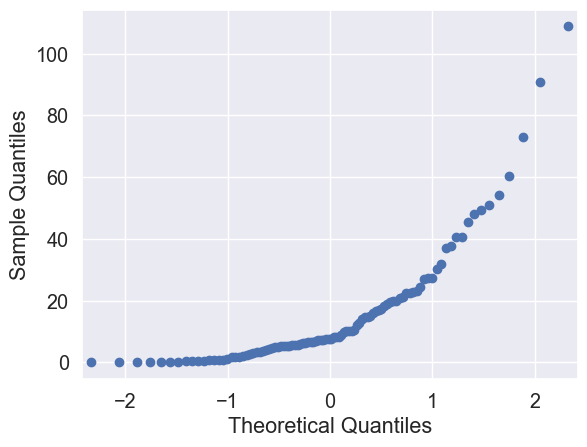

In [152]:
qqplot((X - np.min(X) + 1e-7)**3);

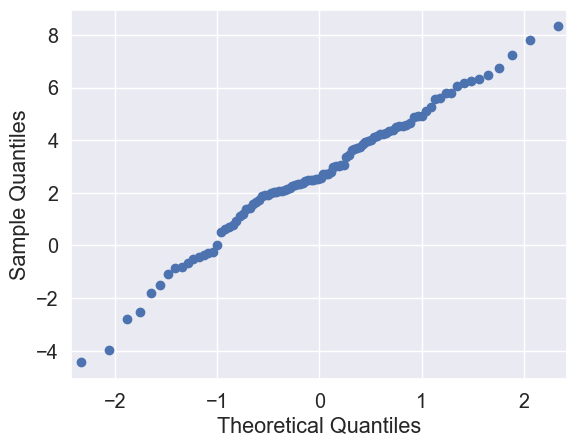

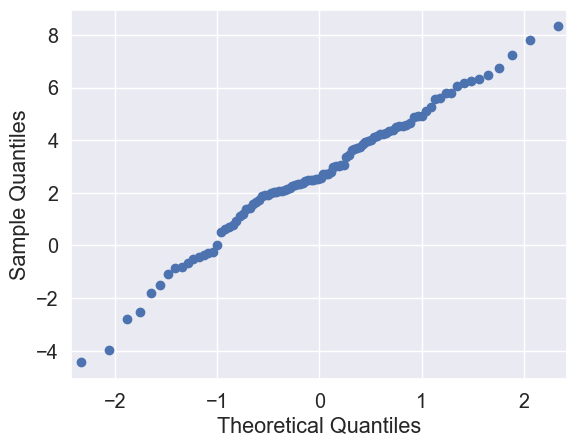

In [155]:
qqplot(stats.boxcox((X - np.min(X) + 1e-7)**3)[0])

## Стандартизация

In [ ]:
x = df['total_bill']

x.mean(), x.std()

In [ ]:
z = (x-x.mean())/x.std()

# стандартизация
z.mean(), z.std()

## Сдвиги по осям X и Y

In [ ]:
df.head()

In [ ]:
sns.scatterplot(data=df, x='total_bill', y='tip');

In [ ]:
sns.kdeplot(data=df, x='total_bill', y='tip', fill=True,);

In [ ]:
df.cov()

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(211)
sns.scatterplot(x=df['total_bill'], y=df['tip']);
plt.xlim(-2,100)
plt.ylim(-2,10)


plt.subplot(212)
sns.scatterplot(x=df['total_bill']*2, y=2+df['tip']/2);
plt.xlim(-2,100)
plt.ylim(-2,10)

plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(x=(df['total_bill']-df['total_bill'].mean())/df['total_bill'].std(), 
                y=(df['tip']-df['tip'].mean())/df['tip'].std());

## Кодирование категориальных переменных

In [51]:
pd.get_dummies(df, drop_first=True)

,total_bill,tip,size,total_bill_boxcox,total_bill_log,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,-0.146272,2.889816,1,1,0,0,1,1
1,10.34,1.66,3,-1.263499,2.428336,0,1,0,0,1,1
2,21.01,3.50,3,0.343298,3.091497,0,1,0,0,1,1
3,23.68,3.31,2,0.621586,3.205993,0,1,0,0,1,1
4,24.59,3.61,4,0.709646,3.242202,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.099066,3.402197,0,1,0,1,0,1
240,27.18,2.00,2,0.944244,3.338613,1,0,0,1,0,1
241,22.67,2.00,2,0.519996,3.164208,0,0,0,1,0,1
242,17.82,1.75,2,-0.036853,2.934920,0,1,0,1,0,1


In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

cat_cols = ['sex','smoker','day','time']
X = ohe.fit_transform(df[cat_cols])

In [53]:
X.toarray().shape

(244, 10)

In [54]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
cat_cols = ['sex','smoker','day','time']
X = ord_enc.fit_transform(df[cat_cols])

In [55]:
ord_enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [56]:
df['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [57]:
df['day'].map({'Fri':0, 'Sat':1, 'Sun':2, 'Thur':3})

0      2
1      2
2      2
3      2
4      2
      ..
239    1
240    1
241    1
242    1
243    3
Name: day, Length: 244, dtype: category
Categories (4, int64): [3, 0, 1, 2]